# python 3.7로 실행하는 경우
## requirements.txt
- datasets==1.15.1
- transformers==4.12.5
- seqeval==1.2.2
- deepspeed==0.5.7
- tensorboard==2.7.0
- seqeval==1.2.2
- sentencepiece
- timm==0.4.12
- Pillow
- einops
- textdistance
- shapely

### 3.10도 그냥 잘되므로 굳이 버전 다운그레이드 할 필요 없음

In [3]:
%conda install pytorch==1.13.0 torchvision==0.14.0 torchaudio==0.13.0 pytorch-cuda=11.7 -c pytorch -c nvidia

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: d:\miniconda\envs\py37

  added / updated specs:
    - pytorch-cuda=11.7
    - pytorch==1.13.0
    - torchaudio==0.13.0
    - torchvision==0.14.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotlipy-0.7.0             |py37h2bbff1b_1003         337 KB
    cffi-1.15.1                |   py37h2bbff1b_3         236 KB
    cryptography-39.0.1        |   py37h21b164f_0         1.0 MB
    cuda-cccl-12.2.128         |                0         1.3 MB  nvidia
    cuda-cudart-11.7.99        |                0         1.4 MB  nvidia
    cuda-cudart-dev-11.7.99    |                0         711 KB  nvidia
    cuda-cupti-11.7.101       



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2




In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
%pip install datasets transformers seqeval Pillow==9.5.0

     ------------------------------------- 486.2/486.2 kB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 15.8 MB/s eta 0:00:00
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.5/2.5 MB 53.8 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 116.3/116.3 kB ? eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 6.3 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 43.5 MB/s eta 0:00:00
     ------------------------------------- 325.6/325.6 kB 21.0 MB/s eta 0:00:00
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
     ---------------------------------------- 153.2/153.2 kB ? eta 0:00:00
  Using cached importlib_metadata-6.7.0-py3-none-any.whl (22 kB)
     ------------

In [1]:
from transformers import AutoModelForTokenClassification, AutoProcessor

In [2]:
processor = AutoProcessor.from_pretrained('nielsr/layoutlmv3-finetuned-funsd', apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained('nielsr/layoutlmv3-finetuned-funsd')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'LayoutLMv3TokenizerFast'.


In [22]:
vars(processor)

{'image_processor': LayoutLMv3ImageProcessor {
   "apply_ocr": true,
   "do_normalize": true,
   "do_rescale": true,
   "do_resize": true,
   "feature_extractor_type": "LayoutLMv3FeatureExtractor",
   "image_mean": [
     0.5,
     0.5,
     0.5
   ],
   "image_processor_type": "LayoutLMv3ImageProcessor",
   "image_std": [
     0.5,
     0.5,
     0.5
   ],
   "ocr_lang": null,
   "resample": 2,
   "rescale_factor": 0.00392156862745098,
   "size": {
     "height": 224,
     "width": 224
   },
   "tesseract_config": ""
 },
 'tokenizer': LayoutLMv3TokenizerFast(name_or_path='nielsr/layoutlmv3-finetuned-funsd', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)}

In [3]:
model.config

LayoutLMv3Config {
  "_name_or_path": "nielsr/layoutlmv3-finetuned-funsd",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "finetuning_task": "ner",
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-HEADER",
    "2": "I-HEADER",
    "3": "B-QUESTION",
    "4": "I-QUESTION",
    "5": "B-ANSWER",
    "6": "I-ANSWER"
  },
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "label2id": {
    "B-ANSWER": 5,
    "B-HEADER": 1,
    "B-QUESTION": 3,
    "I-ANSWER": 6,
    "I-HEADER": 2,
    "I-QUESTION": 4,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 514,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "

In [14]:
from datasets import load_dataset

dataset = load_dataset("nielsr/funsd-layoutlmv3", split='train')
dataset[0].keys()

dict_keys(['id', 'tokens', 'bboxes', 'ner_tags', 'image'])

In [8]:
# tesseract 없을 경우
!pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)


https://github.com/UB-Mannheim/tesseract/wiki

위 링크로 들어가서 최신버전 다운

In [9]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
from PIL import Image

image = Image.open('cropped2.png').convert("RGB")
encoding = processor(image, truncation=True, return_tensors='pt') 
# truncation=True 안하면 embedding에서 list out of range 발생
# return_tensors pytorch(pt)로 설정 안하면 일반 리스트로 처리해서 무수한 에러 발생
encoding

{'input_ids': tensor([[    0,    36,  2191, 14079, 17717, 19713, 11694, 26747,  7744, 42886,
          9162, 17345,   211,  6372, 36296,  1640,   104,   328,  4998, 23075,
         24303,  2925,    35,   211,  6372, 36296,    35,  5926, 11548, 10431,
          4979,  3888,    35,   231,   211,  6372, 36296,    35, 33454,   459,
           391,  5457,   849,  4979,  3888,    35,   262,   211,  6372, 36296,
            35, 20871,   849,  4979,  3888,    35,   132,     4,   245,   211,
          6372, 36296,    35,  1608,  1627,   369, 11548,  4629,  3888,    35,
           204,   211,  6372, 36296,    35, 16562,   384,  4979,  3888,    35,
           195,   211,  6372, 36296,    35, 25239,    10,  4629,  3888,    35,
           231, 33668, 10018, 30696,  2685,  4248,  3858,   250, 15102, 36337,
         15513,  2747,  7831,  1691, 17345,  2444,  1941, 26747,  7744,    36,
           996,  2055, 17399,  1723,    43,  4062, 13181,  1862,  8228,   384,
         18048, 31986,   256,  5382,  

In [4]:
import torch
with torch.no_grad():
    outputs = model(**encoding)
outputs


d:\miniconda\lib\site-packages\transformers\modeling_utils.py:881: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


TokenClassifierOutput(loss=None, logits=tensor([[[-1.6851e-01, -1.3167e-01, -3.2534e-01, -5.7604e-01, -3.5705e-01,
          -3.0892e-01,  1.5396e-01],
         [ 2.9800e+00,  1.4294e+00, -1.9831e+00,  2.5745e+00, -1.5461e+00,
          -2.0696e+00, -2.0155e+00],
         [ 3.4460e+00, -1.0769e+00, -1.2266e+00, -1.3502e+00,  3.2211e+00,
          -2.5553e+00, -1.5426e+00],
         [ 2.9432e+00, -1.3935e+00, -1.4218e+00, -1.3569e+00,  4.1729e+00,
          -2.4552e+00, -1.2371e+00],
         [ 1.9970e+00,  6.3579e-01, -2.2663e+00,  4.2767e+00, -1.4356e+00,
          -1.6804e+00, -2.4012e+00],
         [-1.9796e+00, -4.6126e-01, -1.4642e+00,  7.1698e+00, -3.1396e-01,
          -1.3859e+00, -2.0036e+00],
         [-1.6201e+00, -1.4906e+00, -6.7637e-01, -5.0633e-01,  7.5965e+00,
          -1.6867e+00, -7.9300e-01],
         [-1.4232e+00, -8.4099e-01, -2.0078e+00,  6.7411e+00, -4.2202e-01,
          -5.0009e-01, -2.3024e+00],
         [-1.4450e+00, -1.7806e+00, -1.0234e+00, -5.8684e-01,  7

In [5]:
logits = outputs.logits
logits.shape

torch.Size([1, 139, 7])

In [6]:
predictions = logits.argmax(-1).squeeze().tolist()
predictions

[6,
 0,
 0,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 1,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 0,
 3,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 5,
 6,
 5,
 5,
 3,
 3,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 3,
 3,
 4,
 4,
 5,
 6,
 5,
 3,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 1,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 3,
 4,
 4,
 4,
 6]

In [7]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred in predictions]
true_boxes = [unnormalize_box(box, width, height) for box in token_boxes]

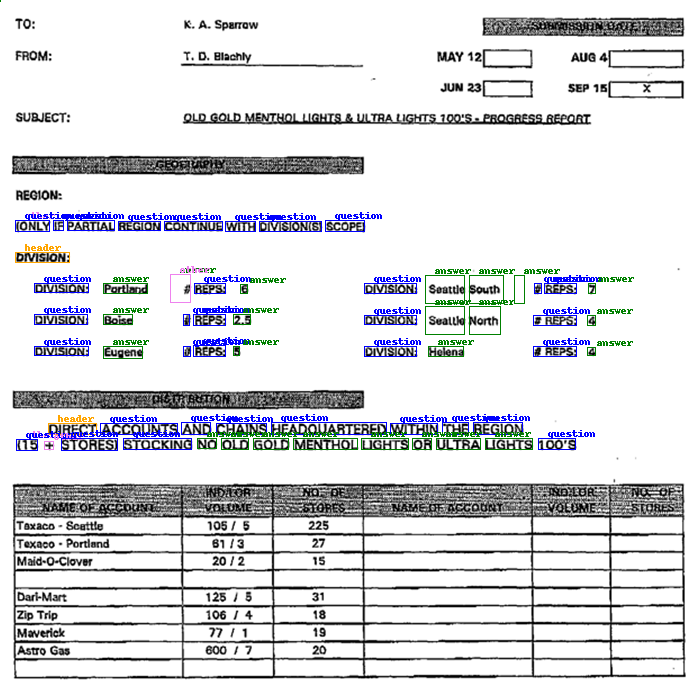

In [8]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image